# Curve Fitting

In this notebook, we learn and explore the following:
1. How to fit curves given some data
2. How to interpret these results

## Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Fitting

To understand how curve fitting works, let's start with a simple curve:

$$f(x) = mx + b$$

where $m$ is the slope of the line and b is the y-intercept.

### Generate Sample Data

Now, let's go ahead and generate a sample dataset to work with.

In [2]:
# create x axis data
n = 50
x = np.linspace(0, 10, n)

In [3]:
x

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

In [4]:
# set values for m and b
m_true, b_true = 3.456, 2

In [5]:
def linear(x, m, b):
    return m*x + b

In [6]:
# create values for y
y = linear(x, m_true, b_true)
y

array([ 2.        ,  2.70530612,  3.41061224,  4.11591837,  4.82122449,
        5.52653061,  6.23183673,  6.93714286,  7.64244898,  8.3477551 ,
        9.05306122,  9.75836735, 10.46367347, 11.16897959, 11.87428571,
       12.57959184, 13.28489796, 13.99020408, 14.6955102 , 15.40081633,
       16.10612245, 16.81142857, 17.51673469, 18.22204082, 18.92734694,
       19.63265306, 20.33795918, 21.04326531, 21.74857143, 22.45387755,
       23.15918367, 23.8644898 , 24.56979592, 25.27510204, 25.98040816,
       26.68571429, 27.39102041, 28.09632653, 28.80163265, 29.50693878,
       30.2122449 , 30.91755102, 31.62285714, 32.32816327, 33.03346939,
       33.73877551, 34.44408163, 35.14938776, 35.85469388, 36.56      ])

### Plot Data

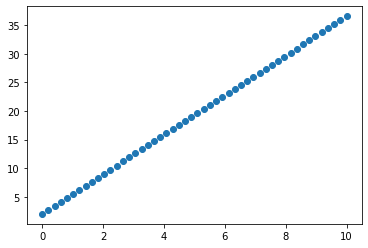

In [7]:
plt.scatter(x, y)
plt.show()

Now we got the values for x and y. Now, this doesn't seem realistic right? Let's introduce some **noise** to the system.

In [8]:
noise = np.random.normal(0, 2, size=n)
y_new = y + noise

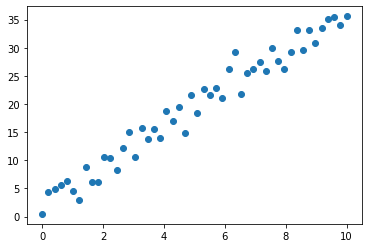

In [9]:
# plot new data
plt.scatter(x, y_new)

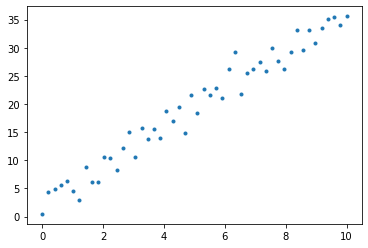

In [10]:
# plot new data
plt.scatter(x, y_new, marker='.')

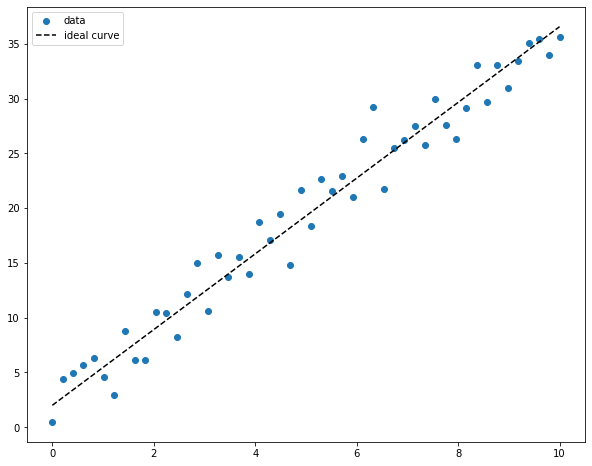

In [11]:
# use matplotlib subplots to make the plots for manageable
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x, y_new, label='data')
ax.plot(x, y, label='ideal curve', linestyle='--', color='k')
ax.legend()

### Manually Fit?

Now, assume that we just got this data. Suppose further that we decided that a linear model would be the best curve to fit. Now, we don't know best parameters `m` and `b` for this model.

Before we proceed with methods in python to determine the best fit, let's explore parameter values for the curve. To measure the error, we will compute the **Sum of Squares Error (SSE)** given by the equation:

$$SSE = \sum_i \big(y - \hat{y}\big)^2$$

In [12]:
# import interactive widgets
from matplotlib.widgets import Slider

In [13]:
from ipywidgets import interact, FloatSlider

In [14]:
def sse(y, yhat):
    return np.sum((y - yhat)**2)

In [15]:
def plot_interactive(m_, b_):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.scatter(x, y_new, label='data')
    
    yhat = linear(x, m_, b_)
    ax.plot(x, yhat, linestyle='--',
            label=f'y = {m_:.2f}x + {b_:.2f} (SSE: {sse(y_new, yhat):.2f})',
            color='r')
    ax.set_ylim(0, 40)
    ax.legend()
    
m_slider = FloatSlider(value=2, min=1, max=5, step=.01, description='m')
b_slider = FloatSlider(value=2, min=0, max=10, step=.1, description='b')

interact(plot_interactive, m_=m_slider, b_=b_slider);

interactive(children=(FloatSlider(value=2.0, description='m', max=5.0, min=1.0, step=0.01), FloatSlider(value=…

### Using Scipy's curve_fit() function

In [16]:
from scipy.optimize import curve_fit

In [17]:
fit_parameters, fit_covariance = curve_fit(f=linear, xdata=x, ydata=y_new)
fit_parameters

array([3.3778682 , 2.51485005])

In [18]:
fit_covariance

array([[ 0.00899959, -0.04499797],
       [-0.04499797,  0.30304756]])

In [19]:
sse(y_new, linear(x, fit_parameters[0], fit_parameters[1]))

187.33849229764164

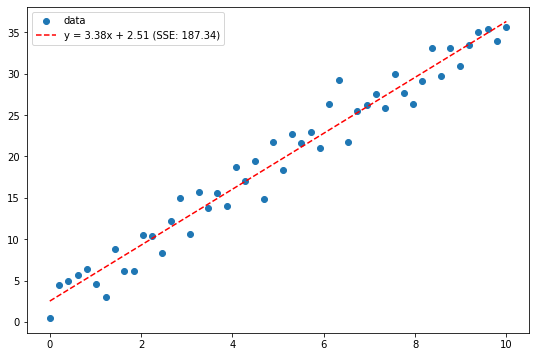

In [20]:
# use matplotlib subplots to make the plots for manageable
fig, ax = plt.subplots(figsize=(9, 6))
scatter = ax.scatter(x, y_new, label='data')

# plot of fitted linear model
m = fit_parameters[0]
b = fit_parameters[1]
yhat = linear(x, m, b)
line, = ax.plot(x, yhat, linestyle='--', color='r')
ax.legend(['data',
           f'y = {m:.2f}x + {b:.2f} (SSE: {sse(y_new, yhat):.2f})'])

### Fit using lmfit package

In [21]:
from lmfit import Model

In [22]:
linear_model = Model(linear)
result = linear_model.fit(y_new, x=x, m=1, b=1)

In [23]:
result

In [24]:
result.values

{'m': 3.377868203156053, 'b': 2.5148500501883886}

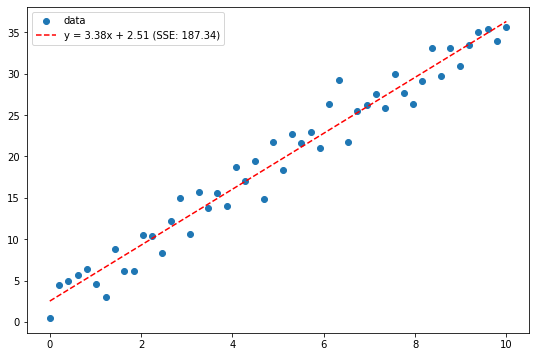

In [25]:
# use matplotlib subplots to make the plots for manageable
fig, ax = plt.subplots(figsize=(9, 6))
scatter = ax.scatter(x, y_new, label='data')

# plot of fitted linear model
m = result.values['m']
b = result.values['b']
yhat = linear(x, m, b)
line, = ax.plot(x, yhat, linestyle='--', color='r')
ax.legend(['data',
           f'y = {m:.2f}x + {b:.2f} (SSE: {sse(y_new, yhat):.2f})'])

### Uncertainty
Aside from getting the best fit model, we are also interested in knowing the uncertainty of our estimate.

#### Confidence Interval

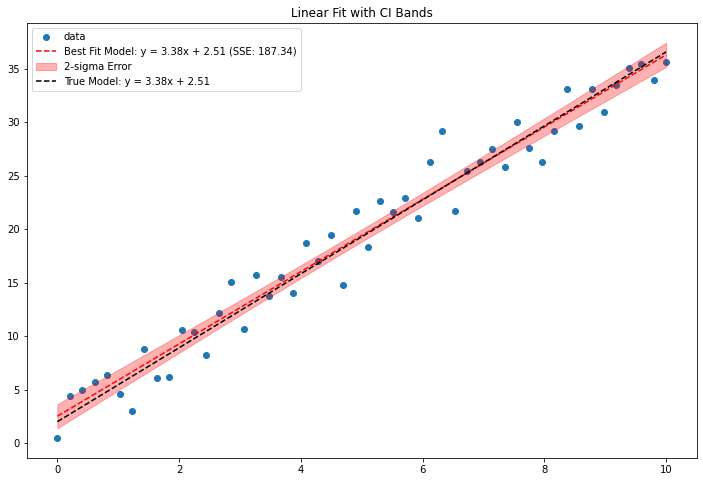

In [26]:
error = result.eval_uncertainty(result.params, sigma=2)

# use matplotlib subplots to make the plots for manageable
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(x, y_new, label='data')

# plot of fitted linear model
m_ = result.values['m']
b_ = result.values['b']
yhat = linear(x, m_, b_)
line, = ax.plot(x, yhat, linestyle='--', color='r',
                label=f'Best Fit Model: y = {m_:.2f}x + {b_:.2f} (SSE: {sse(y_new, yhat):.2f})')
ax.fill_between(x, yhat + error, yhat - error, label='2-sigma Error',
                alpha=.3, color='r')
ax.plot(x, y, color='k', label=f'True Model: y = {m:.2f}x + {b:.2f}',
        linestyle='--')
ax.set_title('Linear Fit with CI Bands')
ax.legend();

#### Prediction Interval
Estimating the uncertainty in predictions requires a little more thought. The reason for this is that we need to make an assumption of how the data gave rise. In this particular example, we knew ahead of time that the noise is gausian (coming from a normal distribution). However, this might not be the case in a specific problem that you are working with. And so, this requires more deliberation.

Now, suppose that we have enough evidence to say that the noise in our data is gaussian, then we can perform the following steps:

In [27]:
noise = np.std(y_new - yhat)
noise

1.9356574712362806

In [28]:
preds = np.array([np.random.normal(yhat, noise) for j in range(10000)])
upper, lower = np.quantile(preds, [.025, .975], axis=0)

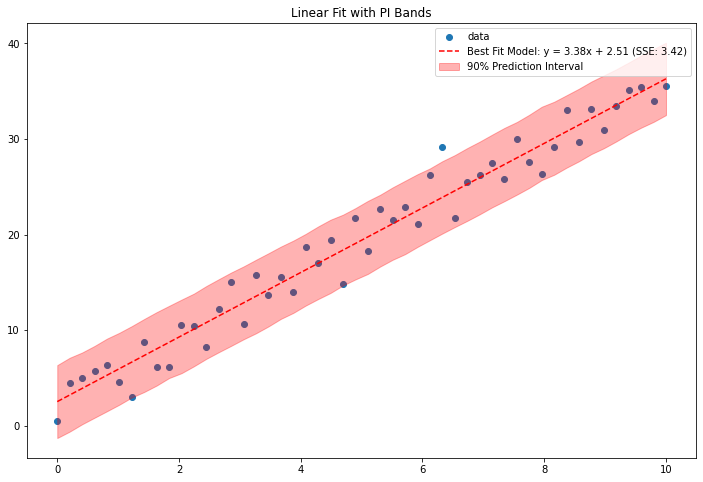

In [29]:
# use matplotlib subplots to make the plots for manageable
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(x, y_new, label='data')

line, = ax.plot(x, yhat, linestyle='--', color='r',
                label=f'Best Fit Model: y = {m_:.2f}x + {b_:.2f} (SSE: {sse(y, yhat):.2f})')
ax.fill_between(x, upper, lower, label='90% Prediction Interval',
                alpha=.3, color='r')
ax.set_title('Linear Fit with PI Bands')
ax.legend();